### Installation notes 

##### Prerequisites 
Python v3 \
Jupyter notebook 

##### Python packages to run the code
pip install networkx \
pip install matplotlib 

#### Writing up what each of the classes are doing
- **gfa parser class**: reads the GFA output from SPAdes output and writing out links between the nodes to a dictionary. 
    - **input** SPAdes gfa file
    - **return** list of all the edges, dict of the nodes and their coverage and dict of nodes and their sequences. 
    - grabs the links between the nodes and the coverage of each node that has more than 2 - for the coverage class. 
    
    
- **maxDepth function**: count the depth of the right tree compared to the left tree from a given node in the dfs tree.
    - **input** the node and the graph
    - **return** depth of the left tree and the right tree 

    
- **rename_node function**: if a node is being traveresed more than once than the node is reanamed. 
    - **input** the node that needs to be renamed 
    - **return** the new node name to be added to the new graph
    

- **check_before_adding**: before adding a node, check if the node already exists or not, if it already exists then check if the neighbors are equal 2. 
    - **input** node1, node2 and new graph 
    - **return** new graph after adding the nodes accordingly
    - the function before adding, does call the rename_node function to make sure the correct node anme is being added
    
    
- **path_to_first_node**: using the shortest path function to count the shortest path from the left and right neighbor. 
    - **input** last_node, first_node, old_graph
    - **return** shortest left path and right path 


- **graph_to_fasta**: converts the graph that contains only the node names to fasta format. 
    - **input** final complete graph object and dictionary with nodes and seqeunces 
    - **return** final seqRecord object
    - This function takes the final complete graph that contains only the nodes, and their coressponding sequences. These are added to one fasta file. 
    
    
- final function - that calls the gfa parse and writes to a graph. Then the graph is re-added to a new graph to make the graph complete and eulerian

In [80]:
#gfa parser 
from collections import defaultdict

class gfa_parser:
    '''
    Read the spades output in GFA v1.0 graph to genrate 
    nodes and edges. 
    
    #Class initiation
    x=gfa_parser("chrom2.gfa")
    
    #calling a specific function within the class
    print(x.gfa_parser("chrom2.gfa"))
    #prints all the nodes and edges from the gfa 
    
    '''
    def __init__(self, gfa):
        self.gfa=gfa
        
    
    def gfa_parser(self, gfa):
        #reading the gfa file to a new variable
        g1=open(gfa, "r")
        nodes=[]
        edges=[]
        coverage={}
        sequences={}
        for line in g1:
            if (line.startswith("L")):
                link=line.split('\t')
                edges.append([link[1],link[3]])
            
            elif (line.startswith("S")):
                info=line.split('\t')
                seq=float(info[1])
                sequences[seq]=info[2]
                cov=info[-1].split(":")[-1]
                cov=float(cov.strip("\n"))
                if (cov>2.0):
                    coverage[info[1]]=cov
        
        #user input
        repeats=["12",""]
        for f in repeats:
            cv=coverage.get(f)
            for index in range (int(cv)):
                edges.append([f,f])
    
        return(edges, coverage, sequences)

########################################
# Driver program to test above class
########################################
x=gfa_parser("chrom1.gfa")
##calling a specific function within the class
edges=x.gfa_parser("chrom1.gfa")
rt=edges[0]
print (len(rt), rt)

90 [['2', '12'], ['3', '12'], ['3', '17'], ['4', '37'], ['5', '22'], ['5', '37'], ['6', '24'], ['6', '25'], ['8', '17'], ['9', '39'], ['9', '40'], ['11', '27'], ['11', '31'], ['12', '12'], ['16', '11'], ['17', '19'], ['18', '28'], ['18', '41'], ['19', '17'], ['20', '36'], ['22', '2'], ['23', '21'], ['23', '24'], ['25', '22'], ['26', '8'], ['26', '23'], ['27', '24'], ['28', '36'], ['29', '9'], ['29', '18'], ['30', '9'], ['30', '18'], ['31', '4'], ['31', '21'], ['31', '24'], ['32', '25'], ['32', '26'], ['33', '32'], ['33', '39'], ['33', '40'], ['34', '38'], ['35', '38'], ['36', '11'], ['37', '21'], ['38', '32'], ['39', '35'], ['40', '34'], ['41', '16'], ['41', '20'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12', '12'], ['12

### Notes

The above code prints out the nodes in the chromosome that have more than 2x coverage, so they are likely repeat regions. For confirmation, the seqeunces will be copied over and aligned against the nanopore long reads to confirm if they are infact repeats. 

For instance for ED252, chrom2 had no repeats that were greater than 2, while chrom1 had 24 nodes that were repeats. 

**Ran bandage plot for chromosome1.gfa BLAST search against the sequences that have more than 2x coverage**

Below includes order of the rrn operon in most of the chromsomes. Confirmed  these sequences using BLAST as well, there are several nanopore reads with these sequences - Example 6de21c81-fa59-4e88-9fe0-b1d585bfa675 has 10 of the below sequences and 99cce163-3455-46f7-8887-5483343d16b7.

|Node |coverage |length | num of hits before|num of hits after| Annotation |
|---|-----|-----|---------|-----|-----|
|25| 3.91| 85bp | 6 |9| 5S ribosomal sequence| 
|26| 11.96| 81bp  |6 |9| 5S ribosomal sequence |
|32| 13.16 | 57bp | 5| 7| no associated gene/protein |
|9 | 8.45 | 2941bp | 4| 7| 23S ribosomal sequence|
|29| 2.91| 61bp| 5 | 7| 16S-23S ribosomal RNA intergenic spacer|
|30 | 8.18| 57bp |5| 7| 16S-23S ribosomal RNA intergenic spacer|
|18| 11.85| 168bp |4 | 7| 23S ribosomal sequence|
|16| 4.89| 276bp | 6 | 9| 16S-23S ribosomal RNA intergenic spacer|
|11 | 14.56 |1604bp | 4 | 7| 16S ribosomal sequence|
|31| 11.07| 57bp | 5 | 8|no associated gene/protein |
|21| 9.50| 152bp |6| 9| no associated gene/protein|
|24| 5.85| 140bp | 6 | 9| no associated gene/protein| 
|27| 5.04| 75bp | 5 | 8| no associated gene/protein|

Conclusion - Since the above RNA are already found approximately 7 times in chromosome 1 and once in chromosome 2, didnt add these sequences again.

|Node |coverage |length | num of hits before|num of hits after| Annotation |Likely repeat sequence |
|---|-----|-----|---------|-----|-----|----|
|22| 2.39| 144bp |5 | 8| tRNA sequence|multiple places|
|17| 3.09| 205bp |4 | 7| tRNA sequence|multiple places|

Conclusion - The tRNA sequences align at multiple places - and not sure how to detangle this. 

|Node |coverage |length | num of hits before|num of hits after| Annotation |Likely repeat sequence | nanopore reads |
|---|-----|-----|---------|-----|-----|----|---|
|28| 6.73| 70bp| 1 | 1| 16S-23S ribosomal RNA intergenic spacer| repeat|6e5d2ec6-8da1-4d65-b4b3-7ca64210c18d, 8325866e-2b95-405e-9a53-f1b35696d56d, 930ddd43-974e-4c91-978b-5b0eaccc41ad (100% pid and 70bp in length)|
|12 (self loop)| 41.66| 336bp | 2| 2| hypothetical protein |repeat|aa3f95b9-4aa9-4639-8e56-5a53cd42e95d, da702a33-0ac2-4993-a19d-539d7206489d, bc276ee2-23d6-45ef-a9fb-aca9fdb72e2c (top three reads, but each of these reads show that the 12 seqeunces is repeated on the same nanopore read)|
|23| 10.54| 142bp |1 | 1| no associated gene/protein |repeat|aae08399-414f-4b89-943c-d997cd1e51ec (best hit), multiple reads but doesnt show evidence of repeats like 12|
|33| 7.59| 42bp | 2 | 2| no associated gene/protein|repeat|aae08399-414f-4b89-943c-d997cd1e51ec,06008824-bf67-4a6e-ad3b-6c146a5a629c, 8325866e-2b95-405e-9a53-f1b35696d56d, ed3cf1af-9eb3-463c-8360-735a5de87e8a, 1cef8308-f6d3-4efb-b787-247161ca4418, 97c0acbd-e6d8-4884-9a70-8ac6481fb784 (100%pid and 42bp in length)|

Conclusion - add repeat function to add these sequences as loops. Most of these sequences align against multiple reads, except 12. 

|Node |coverage |length | num of hits before|num of hits after| Annotation |
|---|-----|-----|---------|-----|-----|
|36| 8.12| 27bp | 0 | 0| -|
|37| 3.16| 21bp | 0 | 0| - |
|38| 2.84 | 15bp | 0 | 0| - |
|39| 4.58| 7bp | 0 | 0| -|
|41 | 5.86| 6bp| 0| 0| -| 

Conclusion - ignored the above sequences 

From the above table, most of these sequences are part of the ribosomal operon.  
***Vibrio splendidus* genome Chromosome 1 contains 7 rRNA genes and 97 tRNA genes, while chromosome 2 contains 1 rRNA gene and 17 tRNA genes**

Sequences not found in the ribosomal operon - 
1st operon - 12, 17, 23, 28, 33 -  **node 2, 22 followed right after the operon** \
2nd operon - 12, 9, 16, 28, 29, 30, 33 - **incomplete**\
3rd operon - 12, 17, 22, 23, 28, 33 \
4th operon - 12, 17, 23, 28, 33 - **22 followed right after the operon** \
5th operon - 12, 17, 23 - **preceeded by 17 and 22 tRNA  and has most of the repeat regions**\
6th operon - 12, 17, 22, 28, 33, 23 - **node 4** \
7th operon - 12, 17, 23, 28, 33, 23 - **node 4** 

Aligned against chromsome 2 gfa file \
1st operon - 12, 17, 22, 23, 28, 36, 33 - but its part of node 1, so dont need to add these sequences again

In [63]:
# Python3 program to find the maximum depth of tree from a given node
# counts the depth of the tree from the left tree and right tree
# Python3 program to find the maximum depth of tree 

import networkx as nx
# A binary tree node 
def maxDepth (node, dfs, graph): 
    if node is None: 
        return (0)
    else : 
        # Compute the depth of each subtree 
        n=list(G.nodes())[0]
        value=dfs.get(node)
        left_tree=0
        right_tree=0
        left=value[0]
        right=value[1]
        while (left is not None):
            try:
                left=dfs[left][0]
                left_tree=left_tree+1
            except KeyError:
                break
        while (right is not None):
            try:
                right=dfs[right][0]
                right_tree=right_tree+1
            except KeyError:
                break
        
    return (left_tree+1, right_tree+1)

########################################
# Driver program to test above function 
########################################
#x=gfa_parser("chrom1.gfa")
##calling a specific function within the class
#edges=x.gfa_parser("chrom1.gfa")
#G=nx.Graph()
#G.add_edges_from(edges)
#n=list(G.nodes())[0]
#successors=nx.dfs_successors(G,n)
##print (successors)
##print (successors["22"])
#print (maxDepth('9', successors, G))

In [64]:
# this function only renames the node since it already exists in the 
#   new graph 
# assumes that the node was already checked to confirm that 
#   the node is already added to the new graph 
def rename_node(node, new_graph):
    nodes=new_graph.nodes()
    count=1
    new_node=node+"_"+str(count)
    if (new_node in nodes):
        ngbr=len(list(new_graph.neighbors(new_node)))
        if (ngbr==1):
            new_node=new_node
        elif (ngbr==2):
            count=count+1
            new_node=node+"_"+str(count)
    
    return (new_node)

In [65]:
#before adding a  new edge, check if the nodes in the edge are 
#  1) first that the node exists or not in the new_graph 
#  2) check if the node neighbors are 2 or 1
def check_before_adding(node1, node2, new_graph):
    if (node1 not in new_graph.nodes()) and (node2 not in new_graph.nodes()):
        new_graph.add_edge(node1, node2)
    elif (node1 in new_graph.nodes()) and (node2 not in new_graph.nodes()):
        n1_ngbrs=len(list(new_graph.neighbors(node1)))
        if (n1_ngbrs==1):
            new_graph.add_edge(node1, node2)
        elif (n1_ngbrs==2):
            x=rename_node(node1, new_graph)
            new_graph.add_edge(x, node2)
    elif(node1 not in new_graph.nodes()) and (node2 in new_graph.nodes()):
        n2_ngbrs=len(list(new_graph.neighbors(node2)))
        if (n2_ngbrs==1):
            new_graph.add_edge(node1, node2)
        elif (n2_ngbrs==2):
            x=rename_node(node2, new_graph)
            new_graph.add_edge(node1, x)
    elif (node1 in new_graph.nodes()) and (node2 in new_graph.nodes()):
        n1_ngbrs=len(list(new_graph.neighbors(node1)))
        n2_ngbrs=len(list(new_graph.neighbors(node2)))
        if (n1_ngbrs==1) and (n2_ngbrs==1):
            new_graph.add_edge(node1, node2)
        elif (n1_ngbrs==2) and (n2_ngbrs==1):
            x=rename_node(node1, new_graph)
            new_graph.add_edge(x, node2)
        elif (n1_ngbrs==1) and (n2_ngbrs==2):
            x=rename_node(node2, new_graph)
            new_graph.add_edge(node1,x)
        else:
            k=rename_node(node1, new_graph)
            v=rename_node(node2, new_graph)
            new_graph.add_edge(k,v)
    return(new_graph)

In [66]:
# finding the paths from the last node to the first node and selecting the 
# shortest path
# using the dictionary to retrieve the neighbors
def path_to_first_node(last_node, first_node, old_graph):
    #getting the neighbors of the last node and working on adding the nodes to the graph accordingly
    nbrs=list(old_graph.neighbors(last_node))
    left_path=list(nx.shortest_path(old_graph, source=nbrs[0], target=first_node))
    right_path=list(nx.shortest_path(old_graph, source=nbrs[1], target=first_node))
    return (left_path, right_path)

In [67]:
# Writing out the complete graph as a fasta file. 
# the new complete graph is written out to "new_graph" variable, 
# but this holds only inforamtion about the node names and the sequence itself.
import re
from Bio import SeqIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

def graph_to_fasta(graph, name, sequences):
    #made sure the nodes were added in the correct order
    nodes=graph.nodes()
    final_seq=""
    for f in nodes:
        raw_node=f.split("_")
        seq=sequences[int(raw_node[0])]
        final_seq = final_seq+seq
    final_seq=Seq(final_seq)
    
    #writing out the final seq as a record class
    final = SeqRecord(final_seq, id=name, description="putting it together")
    return (final)
    
###############################################
# Driver program
##############################################
#final=graph_to_fasta(new_graph, sequences)
#print (final.seq)

1

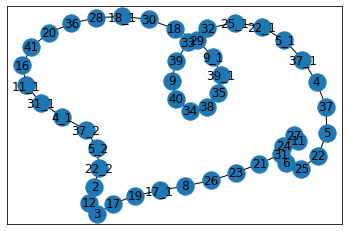

In [83]:
import matplotlib.pyplot as plt
import networkx as nx

#calling the gfa parser first to retrieve the data from gfa
input_name="chrom1.gfa"
repeat_list=["12"]

x=gfa_parser(input_name)
edges=x.gfa_parser(input_name)[0]

# getting the coverage of each of the nodes, reporting the nodes that 
# have coverage more than 2.
coverage=x.gfa_parser(input_name)[1]
#print ("list of nodes that have coverage more than 2")
#print (coverage)

sequences=x.gfa_parser(input_name)[2]

#using networkx package to write the edges from gfa to graph
G=nx.Graph()
G.add_edges_from(edges)
#getting the first node which will be the starting point to write out a 
#depth first traversal graph. 
n=list(G.nodes())[0]
successors=nx.dfs_successors(G,n)
length=len(successors)
#print (successors)
temp_node=0

#Walking through the old graph to expand the graph to traverse all the nodes 
#only once and make the graph eulerian
new_graph=nx.Graph()
count=0
#traverse through the dfs tree and add the edges
while (count < length):
    keys=list(successors.keys())
    #print ("list of keys", keys)
    key=keys[0]
    val=successors[key]
    #print ("key, val, count",key, val, count)
    #print ("successors=", successors)
    
    #adding the first edge if there is only branch down the tree
    if (len(val)==1) and (count==0):
        #print ("adding the first edge")
        new_graph.add_edge(key, val[0])        
        count=count+1 
        successors.pop(key)
        
    elif (count!=0):
        #getting the last node
        new_edges=list(new_graph.edges)
        last_edge=new_edges[-1]
        last_node=last_edge[1]
        last_node=last_node.split('_')[0]
            
        #check point to make sure next value is a continuation
        if (last_node==key):
            #adding other edges if there is only one branch down
            if (len(val)==1):
                #print ("adding edge since there is only one path")
                new_graph=check_before_adding(key, val[0], new_graph)
                count=count+1
                successors.pop(key)
                
            #adding other edges but there are two branches in the tree 
            elif (len(val)!=1):
                #check which direction to traverse
                d=maxDepth(key, successors, G)
                left_depth=d[0]
                right_depth=d[1]

                #if the maximum depth to the left tree and right tree are both 1
                if (right_depth==1) and (left_depth==1):
                    #print ("adding the edges with depth of 1 on both sides")
                    new_graph=check_before_adding(key, val[0], new_graph)
                    #getting the last node
                    new_edges=list(new_graph.edges)
                    last_edge=new_edges[-1]
                    last_node=last_edge[1]
                    #tracing back
                    new_graph=check_before_adding(last_node, key, new_graph)
                    new_graph=check_before_adding(key, val[1], new_graph)
                    successors.pop(key)
                    
                #if the left depth is less than the right depth
                elif (left_depth<right_depth):
                    #print ("left depth is less than right depth", left_depth, right_depth)
                    if (left_depth==1):
                        new_graph=check_before_adding(key, val[0], new_graph)
                        #getting the last node
                        new_edges=list(new_graph.edges)
                        last_edge=new_edges[-1]
                        last_node=last_edge[1]
                        #tracing back
                        new_graph=check_before_adding(last_node, key, new_graph)
                        new_graph=check_before_adding(key, val[1], new_graph)
                        successors.pop(key)
                    else:
                        temp_node=key
                        new_graph=check_before_adding(key, val[0], new_graph)
                        successors.pop(key)
                        successors[key]=(val[1])
                            
                #if the right depth is less than the left depth
                elif (left_depth>right_depth):
                    #print ("left depth is more than right depth", left_depth, right_depth)
                    if (right_depth==1):
                        new_graph=check_before_adding(key, val[1], new_graph)
                        #getting the last node
                        new_edges=list(new_graph.edges)
                        last_edge=new_edges[-1]
                        last_node=last_edge[1]
                        #tracing back
                        new_graph=check_before_adding(last_node, key, new_graph)
                        new_graph=check_before_adding(key, val[0], new_graph)
                        successors.pop(key)
                    else:
                        temp_node=key
                        new_graph=check_before_adding(key,val[1], new_graph)
                        successors.pop(key)
                        successors[key]=(val[0])
                count=count+1
            
        #check point trace back to continue
        elif (last_node!=key):
            #print ("the last node and new key dont match")
            #print ("last node, temp node", last_node, temp_node)
            path=path_to_first_node(last_node, temp_node, G)
            left_path=path[0]
            right_path=path[1]
            #print ("last node, left path, right path", last_node, left_path, right_path)
            if (len(left_path)==len(right_path)):
                for f in range(len(left_path)):
                    if (f==0):
                        new_graph=check_before_adding(last_node, left_path[f], new_graph)
                    else:
                        new_graph=check_before_adding(left_path[f-1], left_path[f], new_graph)
            elif (len(left_path)<len(right_path)):
                for f in range(len(left_path)):
                    if (f==0):
                        new_graph=check_before_adding(last_node, left_path[f], new_graph)
                    else:
                        new_graph=check_before_adding(left_path[f-1], left_path[f], new_graph)
            elif (len(left_path)>len(right_path)):
                for f in range(len(right_path)):
                    if (f==0):
                        new_graph=check_before_adding(last_node, right_path[f], new_graph)
                    else:
                        new_graph=check_before_adding(right_path[f-1], right_path[f], new_graph)
            new_graph=check_before_adding(temp_node, successors[temp_node], new_graph)
            successors.pop(temp_node)
         
        #print ("keys", keys)
        #print (new_graph.edges)
        
# adding the last connection from the last node int he dfs graph
# getting the last node 
# adding the last connection to complete the graph
#print ("completing the graph")
new_edges=list(new_graph.edges)
last_edge=new_edges[-1]
last_node=last_edge[1]
last_node=last_node.split('_')[0]
path=path_to_first_node(last_node, n, G)
left_path=path[0]
right_path=path[1]
#print ("left", left_path, len(left_path))
#print ("right", right_path, len(right_path))
if (len(left_path)==len(right_path)):
    for f in range(len(left_path)):
        if (f==0):
            new_graph=check_before_adding(last_node, left_path[f], new_graph)
        else:
            new_graph=check_before_adding(left_path[f-1], left_path[f], new_graph)
elif (len(left_path)<len(right_path)):
    for f in range(len(left_path)):
        if (f==0):
            new_graph=check_before_adding(last_node, left_path[f], new_graph)
        else:
            new_graph=check_before_adding(left_path[f-1], left_path[f], new_graph)
elif (len(left_path)>len(right_path)):
    for f in range(len(right_path)):
        if (f==0):
            new_graph=check_before_adding(last_node, right_path[f], new_graph)
        else:
            new_graph=check_before_adding(right_path[f-1], right_path[f], new_graph)

#print (new_graph.edges)
nx.draw_networkx(new_graph)
#new_list=new_graph.edges()
#print (new_list)

# writing the graph to fasta file 
final=graph_to_fasta(new_graph, input_name, sequences)
SeqIO.write(final, "ED252-chrom1-final.fasta", "fasta")

#### Notes 

The last shell may have to be changed to functions as well.. Not sure how yet in a Jupyter notebook. If changed to a code, then add argparse python package. 

Replace the first line - name="chrom1.gfa" and last line "ED252-chrom1-final.fasta". Replace the names for different files

This generated two files, one for chromosome 1 and another for chromosome 2. In bash ran the command, 
    
`cat ED252-chrom1-final.fasta ED252-chrom2-final.fasta >ED252-final.fasta`
    
   